### **<span style="color:red">Question 1.</span>** Mcculloch-Pitts Neural Networks *<span style="color:cyan">(Deterministic Finite Automaton - DFA)</span>*

In [14]:
from DFA import *

In [15]:
df = pd.DataFrame(columns = ['Present State', 'DFA Input', 'Next State', 'Acceptance'])
for i in range(4):
    ns, acc = dfa(i, 0)
    df.loc[2*i] = [i, 0, ns, acc]
    ns, acc = dfa(i, 1)
    df.loc[2*i + 1] = [i, 1, ns, acc]
df.style.set_properties(**{'text-align': 'center'})

,Present State,DFA Input,Next State,Acceptance
0,0,0,0,0
1,0,1,1,0
2,1,0,2,0
3,1,1,1,0
4,2,0,3,1
5,2,1,1,0
6,3,0,3,1
7,3,1,3,1


### **<span style="color:red">Question 2.</span>** AdaLine and MAdaLine Neural Networks

#### **<span style="color:green">Part 2.1.</span>** AdaLine Neural Network

In [16]:
from AdaLine import *

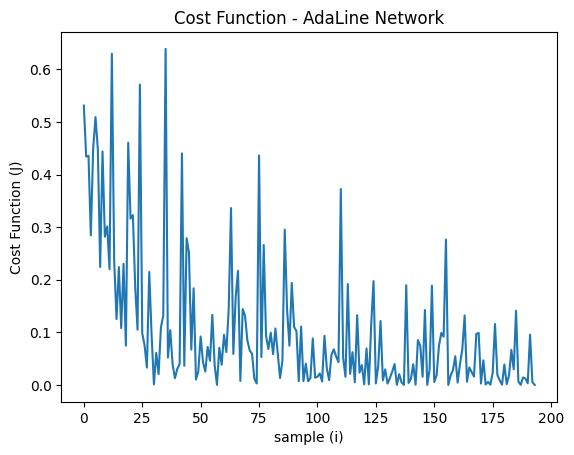

In [17]:
X, T = prepare_data([0, 1], [0, 1], [0.1, 0.2], [0.4, 0.2], 100)

W, b, J = train_AdaLine(X, T)

plot_cost(J)

Accuracy: 100.0%


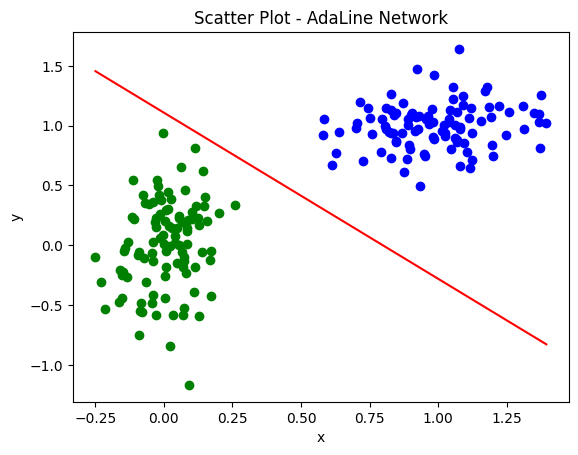

In [18]:
acc = accuracy(X, T, W, b)
visual_result(X, T, W, b, acc)

Accuracy: 97.5%


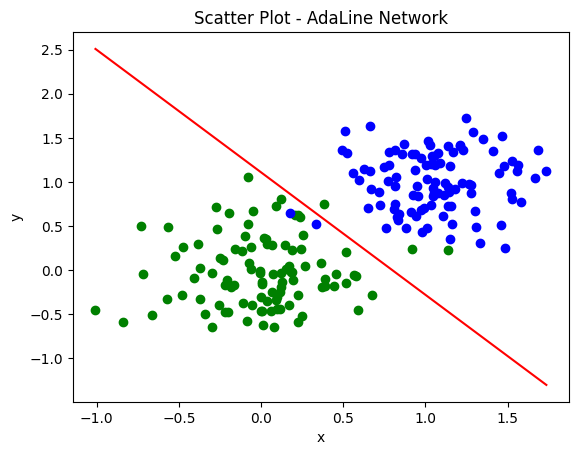

In [19]:
X, T = prepare_data([0, 1], [0, 1], [0.4, 0.3], [0.4, 0.3], 100)

acc = accuracy(X, T, W, b)
visual_result(X, T, W, b, acc)

#### **<span style="color:green">Part 2.2.</span>** MAdaLine Neural Network

In [20]:
from MAdaLine import *

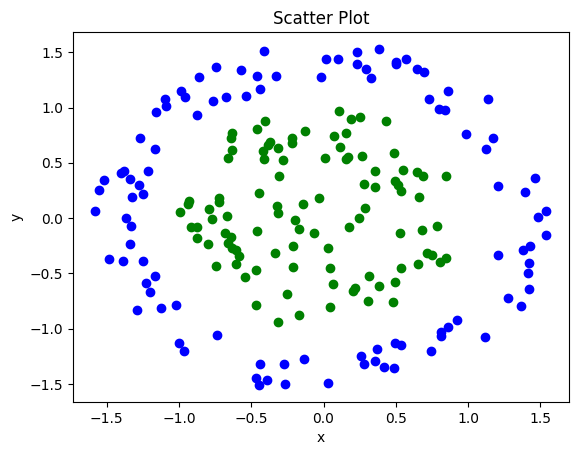

In [21]:
X, T, X_train, X_test, T_train, T_test = read_csv_file()
visual_data(X, T)

Accuracy (m = 3) = 55.00000000000001%
Accuracy (m = 5) = 60.0%
Accuracy (m = 10) = 100.0%


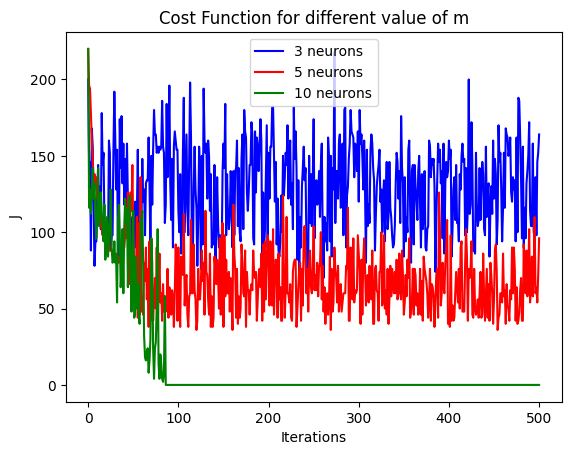

In [22]:
ITR = 500
W3, B3, V3, b3, J3 = train_MAdaLine(X_train, T_train, 3, ITR)
acc3 = accuracy(X_test, T_test, W3, B3, V3, b3)
W5, B5, V5, b5, J5 = train_MAdaLine(X_train, T_train, 5, ITR)
acc5 = accuracy(X_test, T_test, W5, B5, V5, b5)
W10, B10, V10, b10, J10 = train_MAdaLine(X_train, T_train, 10, ITR)
acc10 = accuracy(X_test, T_test, W10, B10, V10, b10)
MAdaLine_Result(J3, J5, J10, acc3, acc5, acc10)

### **<span style="color:red">Question 3.</span>** Auto-Encoders for Classification

In [23]:
from AutoEncoder import *

#### **<span style="color:green">Part 3.1.</span>** Introduction to MNIST Dataset

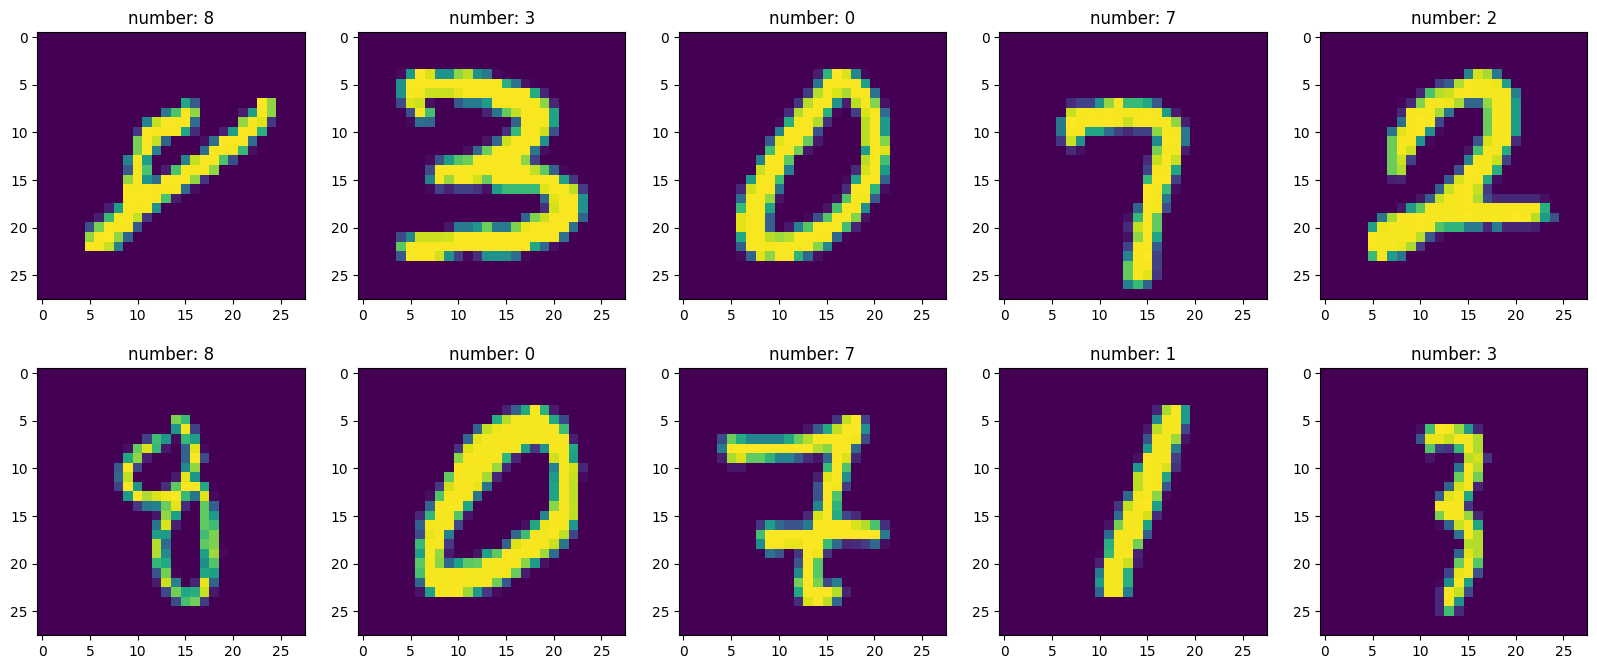

In [24]:
train_images, train_labels, test_images, test_labels = load_data()
train_images = train_images.astype('float32') / np.max(train_images)
test_images = test_images.astype('float32') / np.max(test_images)
train_images_flat = train_images.reshape(len(train_images), np.prod(train_images.shape[1:]))
test_images_flat = test_images.reshape(len(test_images), np.prod(test_images.shape[1:]))
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
random_images(train_images, train_labels)

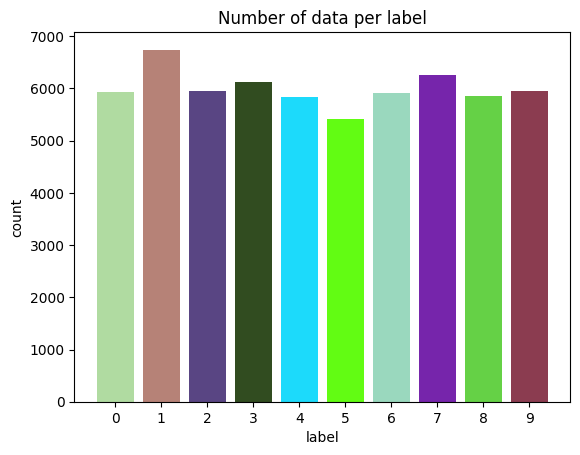

In [25]:
data_per_label(train_labels)

#### **<span style="color:green">Part 3.2.</span>** Auto-Encoder Network

In [26]:
layers_shape_autoencoder = [784, 500, 300, 100, 30, 784]
autoencoder, encoder, decoder, inputs = AutoEncoder(layers_shape_autoencoder)
History_autoencoder = train_net(autoencoder, train_images_flat, train_images_flat, test_images_flat, test_images_flat, 50)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0085 - loss: 0.3011 - val_accuracy: 0.0092 - val_loss: 0.1500
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0107 - loss: 0.1421 - val_accuracy: 0.0110 - val_loss: 0.1240
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0096 - loss: 0.1208 - val_accuracy: 0.0150 - val_loss: 0.1128
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0117 - loss: 0.1116 - val_accuracy: 0.0106 - val_loss: 0.1071
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0125 - loss: 0.1063 - val_accuracy: 0.0125 - val_loss: 0.1029
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0136 - loss: 0.1026 - val_accuracy: 0.0120 - val_loss: 0.0992
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0122 - loss: 0.0991 - val_accuracy: 0.0118 - val_loss: 0.0972
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0134 - loss: 0.0968 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


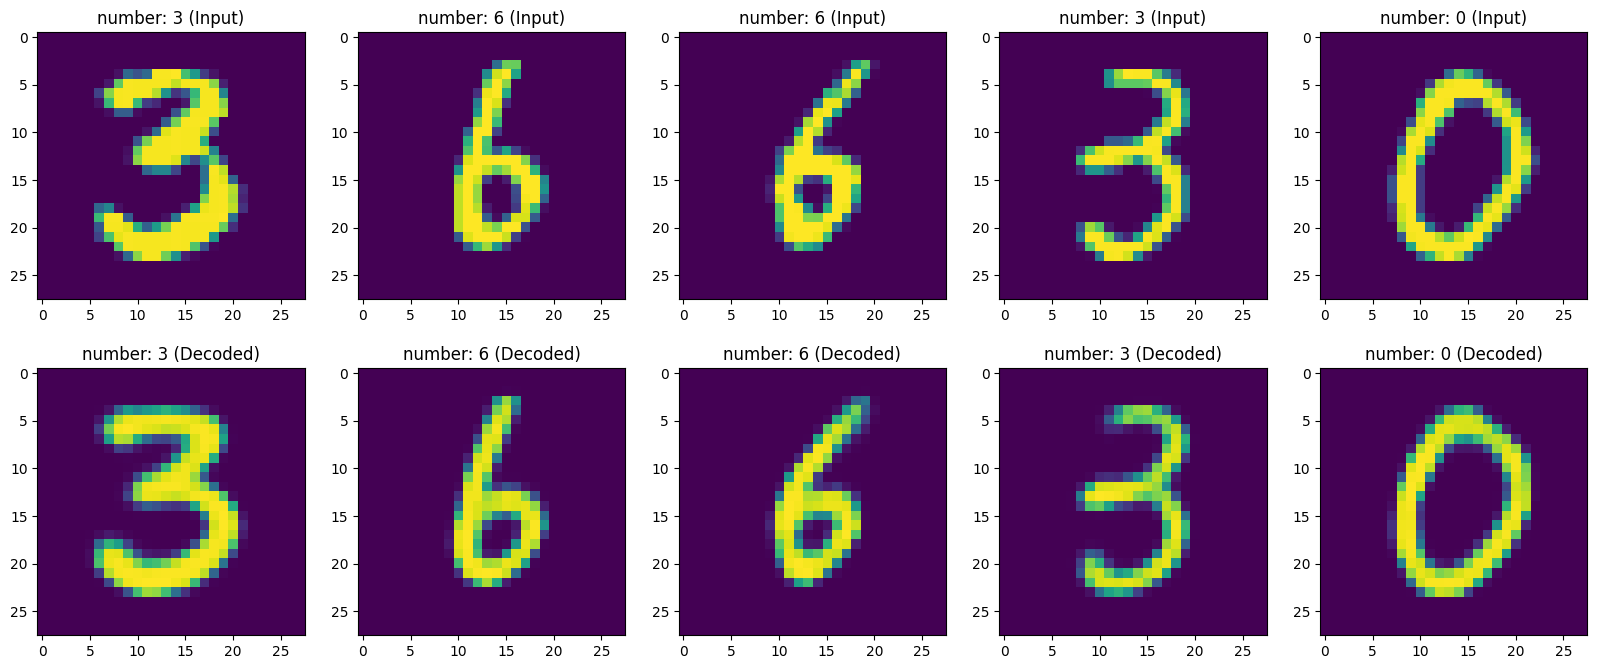

In [27]:
decoded_images = autoencoder.predict(test_images_flat)
decoded_images = decoded_images.reshape(test_images.shape)
show_decode_images(test_images, decoded_images, test_labels)

Text(0.5, 0.98, 'Training and Validation Loss - Autoencoder')

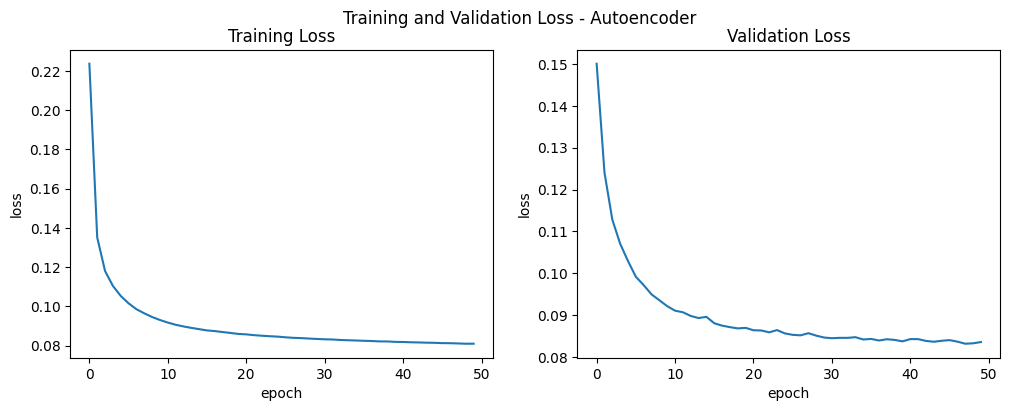

In [28]:
visual_loss(History_autoencoder.history['loss'], History_autoencoder.history['val_loss'])
plt.suptitle('Training and Validation Loss - Autoencoder')

#### **<span style="color:green">Part 3.3.</span>** Classification

In [29]:
encoded_train_images = encoder.predict(train_images_flat)
encoded_test_images = encoder.predict(test_images_flat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
layers_shape_classifier = [layers_shape_autoencoder[4], 60, 30, 10]
classifier = mlp_2h_layer(layers_shape_classifier)
History_classifier = train_net(classifier, encoded_train_images, train_labels_cat, encoded_test_images, test_labels_cat, 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2155 - loss: 0.8264 - val_accuracy: 0.7162 - val_loss: 0.1763
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7760 - loss: 0.1526 - val_accuracy: 0.8835 - val_loss: 0.1036
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.0980 - val_accuracy: 0.9079 - val_loss: 0.0782
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9087 - loss: 0.0752 - val_accuracy: 0.9226 - val_loss: 0.0634
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9201 - loss: 0.0640 - val_accuracy: 0.9301 - val_loss: 0.0561
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9279 - loss: 0.0564 - val_accuracy: 0.9355 - val_loss: 0.0504
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9341 - loss: 0.0505 - val_accuracy: 0.9408 - val_loss: 0.0460
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9376 - loss: 0.0467 - val_accu

Text(0.5, 0.98, 'Training and Validation Loss - Classifier')

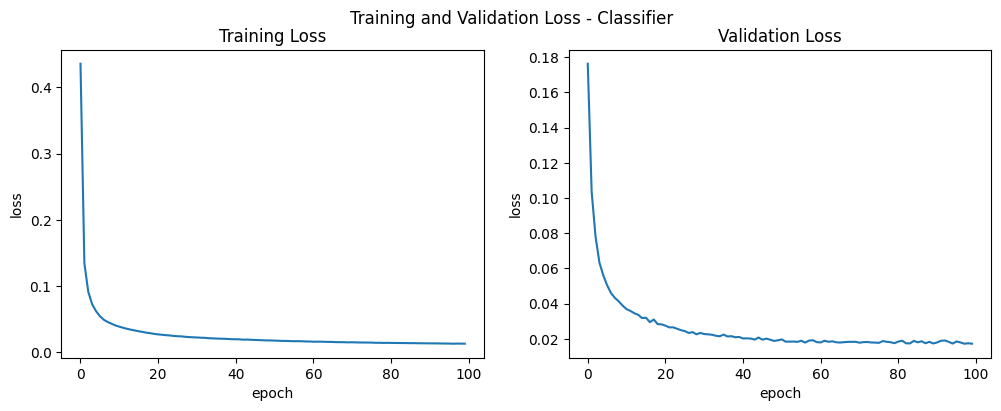

In [35]:
visual_loss(History_classifier.history['loss'], History_classifier.history['val_loss'])
plt.suptitle('Training and Validation Loss - Classifier')

Text(0.5, 0.98, 'Training and Validation Accuracy - Classifier')

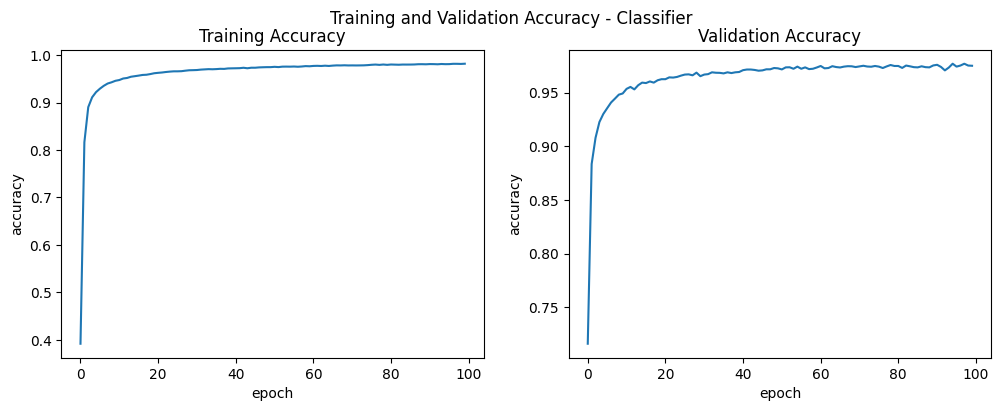

In [36]:
visual_accuracy(History_classifier.history['accuracy'], History_classifier.history['val_accuracy'])
plt.suptitle('Training and Validation Accuracy - Classifier')

In [37]:
encoder_classifier = Model(inputs, classifier(encoder(inputs)), name = 'encoder_classifier')
Train_pred = np.argmax(encoder_classifier.predict(train_images_flat), 1)
Test_pred = np.argmax(encoder_classifier.predict(test_images_flat), 1)
train_acc = sum(Train_pred == train_labels) / len(train_labels)
test_acc = sum(Test_pred == test_labels) / len(test_labels)
print('Train Accuracy: {}%'.format(round(train_acc * 100, 2)))
print('Test Accuracy: {}%'.format(round(test_acc * 100, 2)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Accuracy: 98.16%
Test Accuracy: 97.5%


### **<span style="color:red">Question 4.</span>** Multi-Layer Perceptron (Regression Problem)

In [1]:
from MLP import *
Data = pd.read_csv('CarPrice_Assignment.csv')
Data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### **<span style="color:green">Part 4.1.</span>** Introduction to the Dataset and Preprocessing

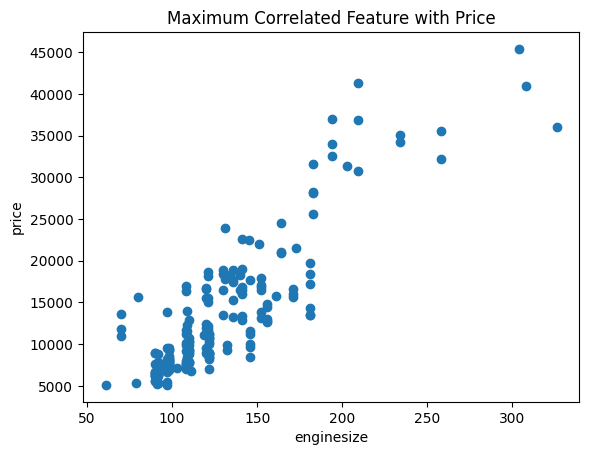

In [2]:
preprocessed_Data = preprocessing(Data)
max_corr(preprocessed_Data)
X_train, T_train, X_test, T_test = Extract_Train_Test(preprocessed_Data, 0.85)

#### **<span style="color:green">Part 4.2.</span>** Multi-Layer Perceptron 

In [3]:
layers_len = [X_train[0].shape, 200, 150, 100, 1]
mlp = network(layers_len)
mlp.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 75, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,551 (236.53 KB)

 Trainable params: 60,551 (236.53 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
History = training(mlp, 250, X_train, T_train, X_test, T_test)

Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 99.9942 - r2_score: -2.6742 - val_loss: 99.9535 - val_r2_score: -2.7195
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.8965 - r2_score: -2.9262 - val_loss: 99.5147 - val_r2_score: -2.6998
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.1232 - r2_score: -2.9242 - val_loss: 96.8413 - val_r2_score: -2.5811
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.9766 - r2_score: -2.8117 - val_loss: 86.3309 - val_r2_score: -2.1382
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.4269 - r2_score: -2.9002 - val_loss: 55.4264 - val_r2_score: -1.0645
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.8368 - r2_score: -0.7239 - val_loss: 31.8915 - val_r2_score: 0.0053
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.8818 - r2_score: -0.1403 - val_loss: 27.9652 - val_r2_score: -0.1194
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.7283 - r2_score: -0.1

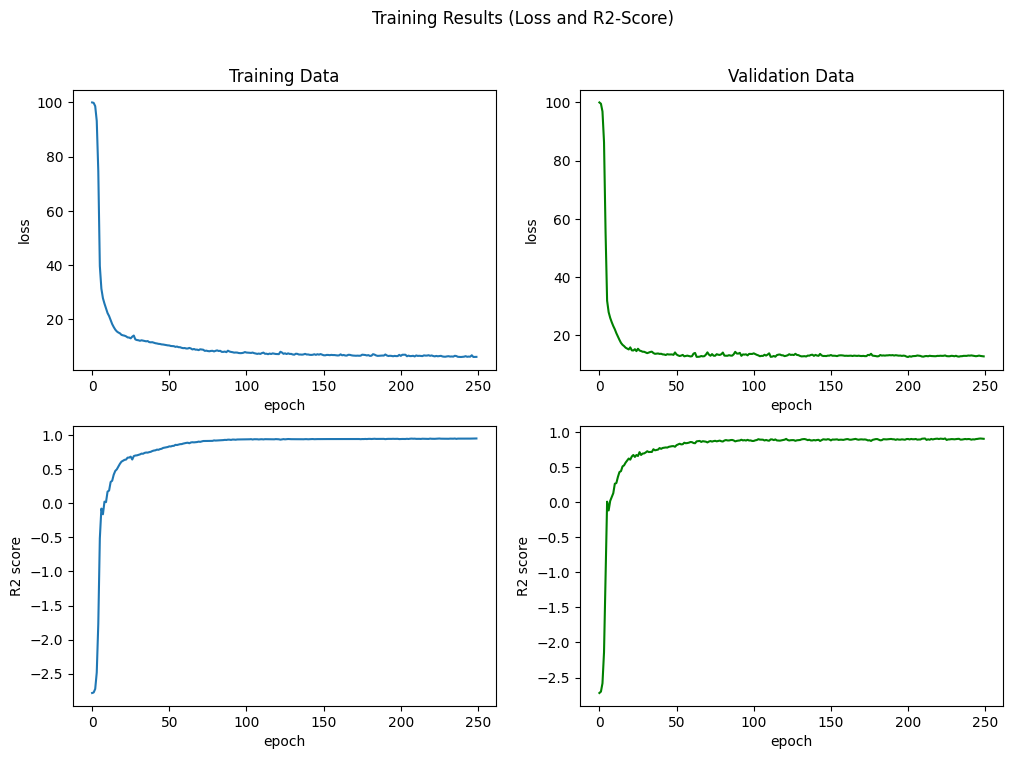

In [5]:
training_results(History)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Real Price for Car Number 10: [16430.]
Predicted Price for Car Number 10: [16880.1] 


Real Price for Car Number 9: [16630.]
Predicted Price for Car Number 9: [12518.669] 


Real Price for Car Number 24: [6938.]
Predicted Price for Car Number 24: [7441.733] 


Real Price for Car Number 23: [15690.]
Predicted Price for Car Number 23: [16636.943] 


Real Price for Car Number 20: [16515.]
Predicted Price for Car Number 20: [15613.918] 



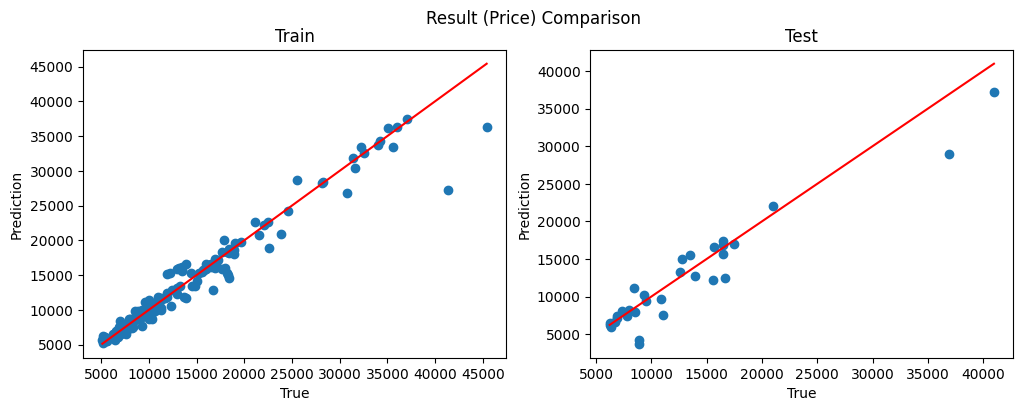

In [6]:
visual_results(mlp, X_train, T_train, X_test, T_test, 5)